# CMSC 33750
## HW1
### 10/3/20
### Lynn Zheng

I used the following query on the GDC website to get the data:

```
cases.project.project_id in ["TCGA-HNSC"] and files.analysis.workflow_type in ["HTSeq - Counts"] and files.data_category in ["transcriptome profiling"] and files.experimental_strategy in ["RNA-Seq"]
```

For the purpose of this assignment, I simply noted down the UUID of the two first files to make a request to the GDC API. They are `a0449ff1-fdc5-44b0-8a9e-db35d1d8dabc` and `c5959596-de4f-4466-980d-d8973ca7e3da`.

I downloaded the two files by requesting `https://api.gdc.cancer.gov/files/<UUID>`. The two files are located in `../data/` and are named `418dd9f0-a87c-402e-8101-2c769e383cc5.htseq.counts` and `c1317d94-8e44-4426-9185-c0af48d12447.htseq.counts`

In [1]:
import pandas as pd

In [2]:
file = '../data/418dd9f0-a87c-402e-8101-2c769e383cc5.htseq.counts'
df = pd.read_csv(file, sep='\t', header=None, index_col=0,
                names=['gene', 'count'])
df.head()

,count
gene,
ENSG00000000003.13,1027
ENSG00000000005.5,0
ENSG00000000419.11,1649
ENSG00000000457.12,689
ENSG00000000460.15,494


In [3]:
df.describe()

,count
count,6.048800e+04
mean,1.463774e+03
std,9.315718e+04
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,5.500000e+01
max,2.260572e+07


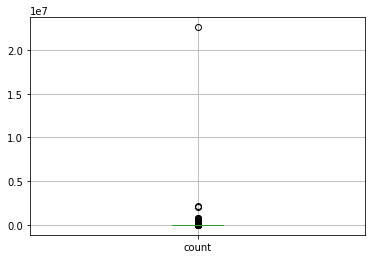

In [4]:
df.boxplot()

The data appears to be heavily right skewed, so we try removing the two outliers on the far right tail.

In [5]:
# remove __alignment_not_unique and __ambiguous
print(df.idxmax(), df.max())
df = df.drop(df.idxmax())
print(df.idxmax(), df.max())
df = df.drop(df.idxmax())
df.describe()

count    __alignment_not_unique
dtype: object count    22605715
dtype: int64
count    __ambiguous
dtype: object count    2214616
dtype: int64


,count
count,6.048600e+04
mean,1.053474e+03
std,1.223990e+04
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,5.500000e+01
max,2.011162e+06


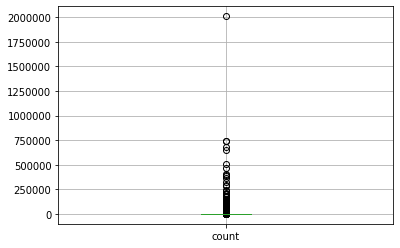

In [6]:
df.boxplot()

As the data still looks right-skewed, we remove another outlier.

In [7]:
# remove __no_feature
print(df.idxmax(), df.max())
df = df.drop(df.idxmax())

count    __no_feature
dtype: object count    2011162
dtype: int64


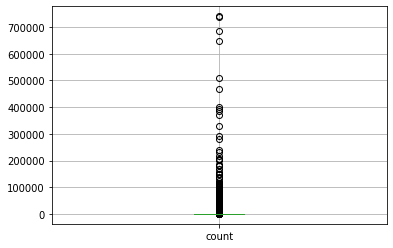

In [8]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1101ca400>]],
      dtype=object)

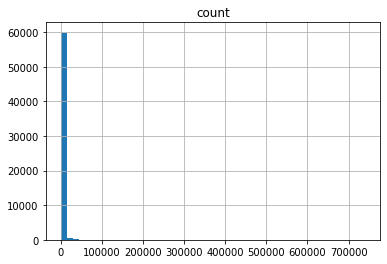

In [9]:
df.hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110325970>]],
      dtype=object)

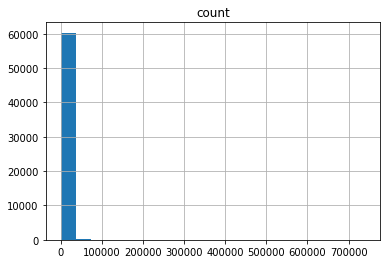

In [10]:
df.hist(bins=20)

We plot a specific upper quantiles to visualize the distribution on the lower tail of the data

In [11]:
def plot_quantiles(df, quantiles):
    for upper in quantiles:
        df.plot(kind='hist',
                range=[0, df['count'].quantile(upper)],
                title='Quantile: (0, {})'.format(upper))

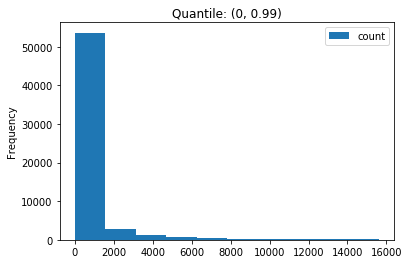

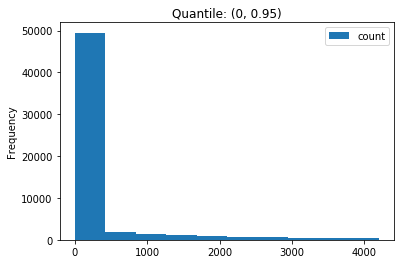

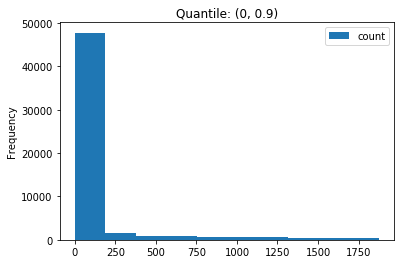

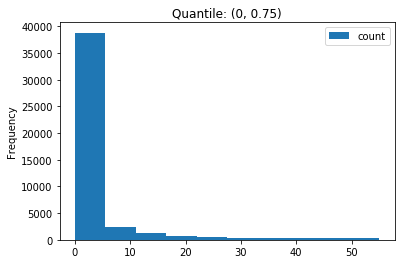

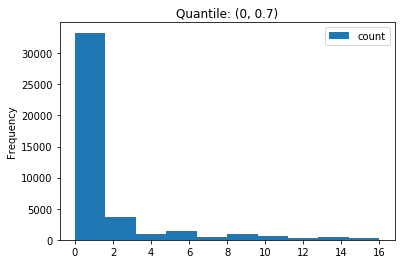

In [12]:
plot_quantiles(df, [0.99, 0.95, 0.9, 0.75, 0.7])

In conclusion, we found that the HTSeq counts data is highly right-skewed, meaning that the majority of genes have very small counts while a few have large counts.

We repeat a briefer version of the above analysis on the other data file.

In [13]:
file = '../data/c1317d94-8e44-4426-9185-c0af48d12447.htseq.counts'
df = pd.read_csv(file, sep='\t', header=None, index_col=0,
                names=['gene', 'count'])
df.describe()

,count
count,6.048800e+04
mean,1.211295e+03
std,8.908374e+04
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,2.100000e+01
max,2.160290e+07


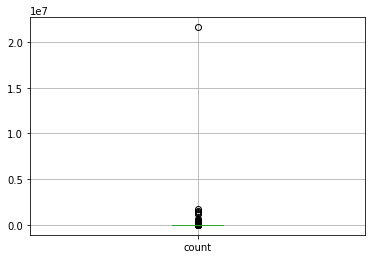

In [14]:
df.boxplot()

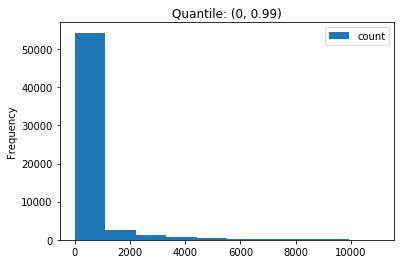

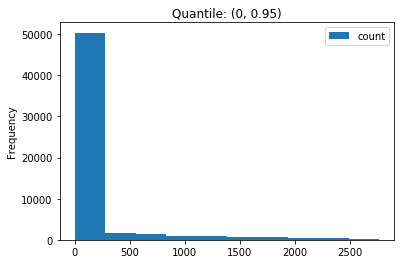

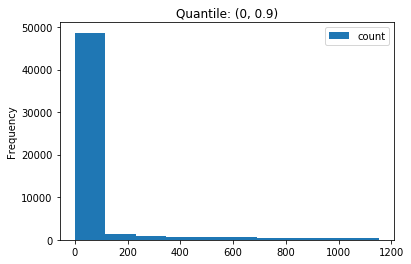

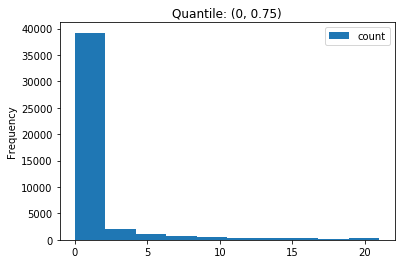

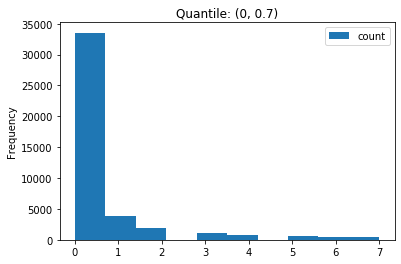

In [15]:
plot_quantiles(df, [0.99, 0.95, 0.9, 0.75, 0.7])